# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer.

#### Report 3 - focus on the demographics of the research population; d. focus on Region

In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-03-01")

# set position for covid text
pos_text_covid = ("2022-02-01")

# set month for chart labels
pos_chart_labels = ("2022-09-01")

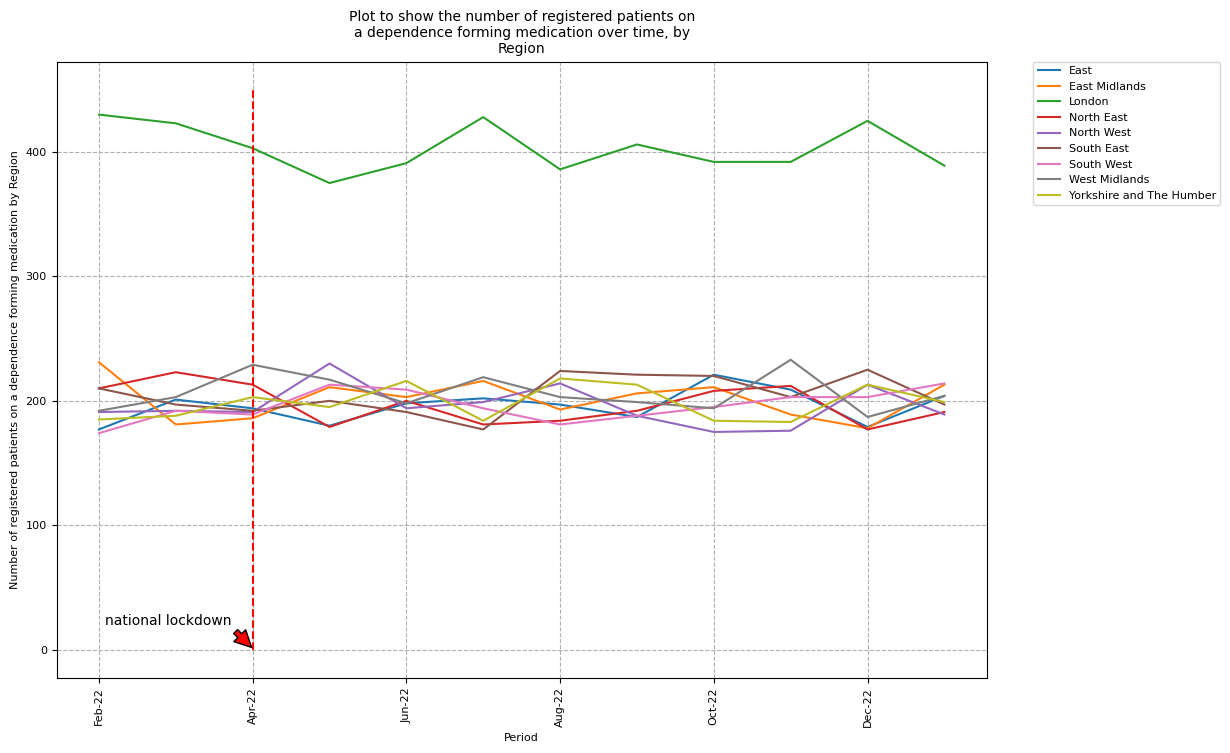

In [2]:
data_measure_dfm_medications_region_rate = pd.read_csv("../output/measure_dfm_medications_by_region_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_region_rate = data_measure_dfm_medications_region_rate.loc[data_measure_dfm_medications_region_rate["region"] != "nan", :]
df_measure_dfm_medications_region_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='research_population')
df_measure_dfm_medications_region_rate.index = pd.to_datetime(df_measure_dfm_medications_region_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_region_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=700000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [3]:
print(tabulate(df_measure_dfm_medications_region_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_region_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22     177              231       430           210           191           210           174              192                         185
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23     204              213       389           191           189           197           214              204                         199


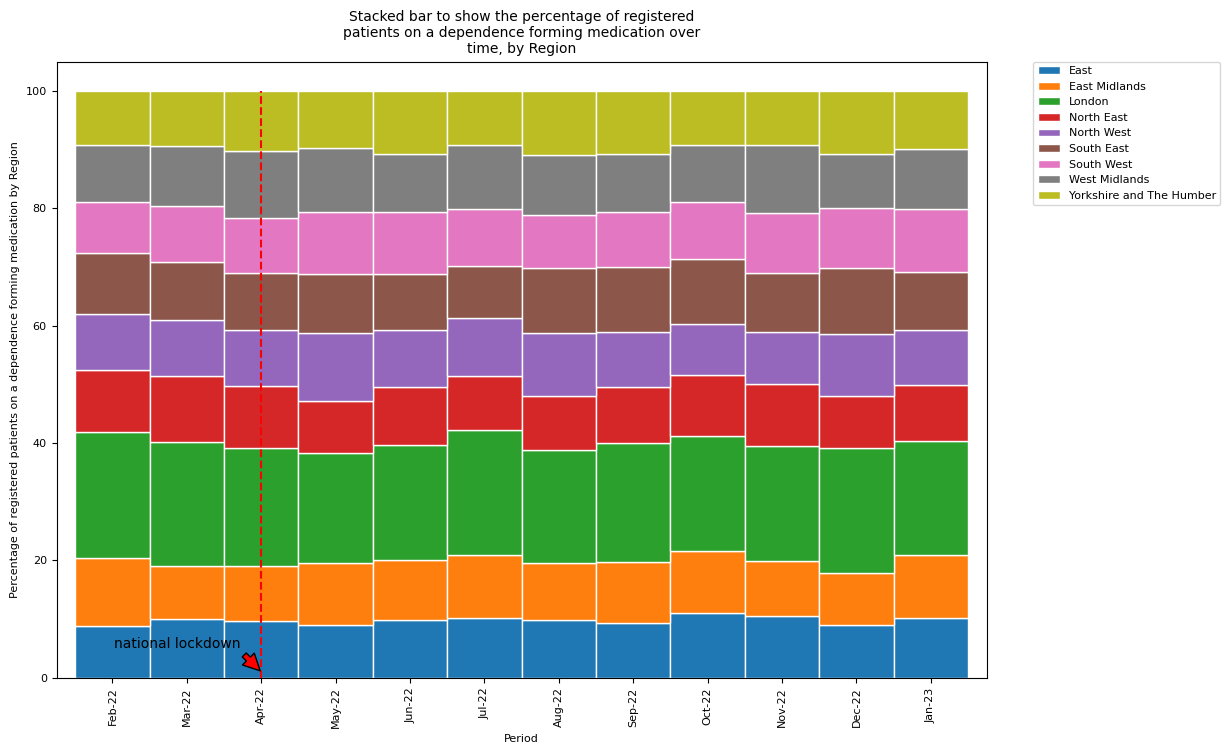

In [4]:
df_region_stacked = pd.DataFrame(df_measure_dfm_medications_region_rate)
df_region_stacked.head()
totrm = df_region_stacked.sum(axis=1)
perrm = df_region_stacked.div(totrm, axis=0).mul(100).round(2)
ax = perrm.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [5]:
print(tabulate(perrm.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrm.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22    8.85            11.55      21.5          10.5          9.55          10.5           8.7              9.6                        9.25
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23    10.2            10.65     19.45          9.55          9.45          9.85          10.7             10.2                        9.95


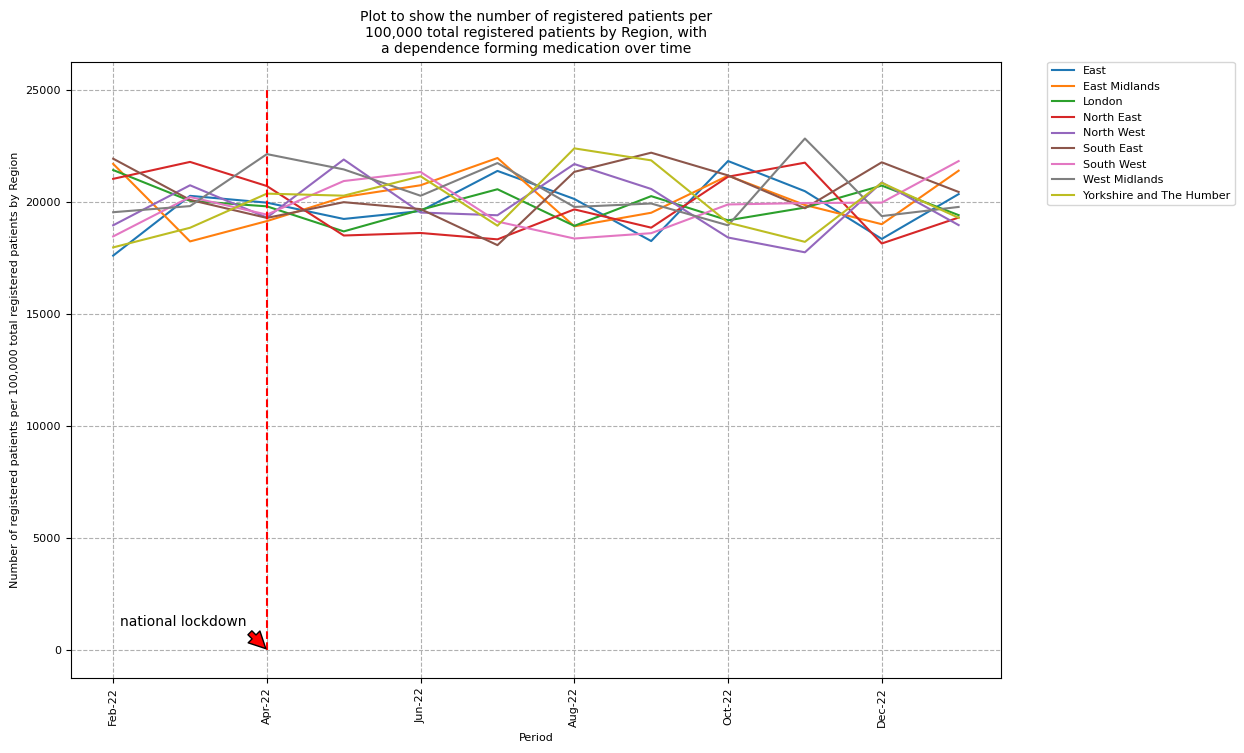

In [6]:
df_temp = pd.DataFrame(data_measure_dfm_medications_region_rate)
df_region_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_region_research_population = pd.DataFrame.pivot(df_region_research_population, index='date', columns='region', values='weighted_research_population')
df_region_research_population.index = pd.to_datetime(df_region_research_population.index).strftime('%b-%y')
ax = df_region_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=150000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [7]:
print(tabulate(df_region_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_region_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22  17594.4          21690.1   21414.3         21021       18948.4       21920.7       18451.7            19532                     17961.2
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23   20339          21385.5   19401.5       19292.9       18956.9       20435.7       21814.5          19767.4                     19282.9


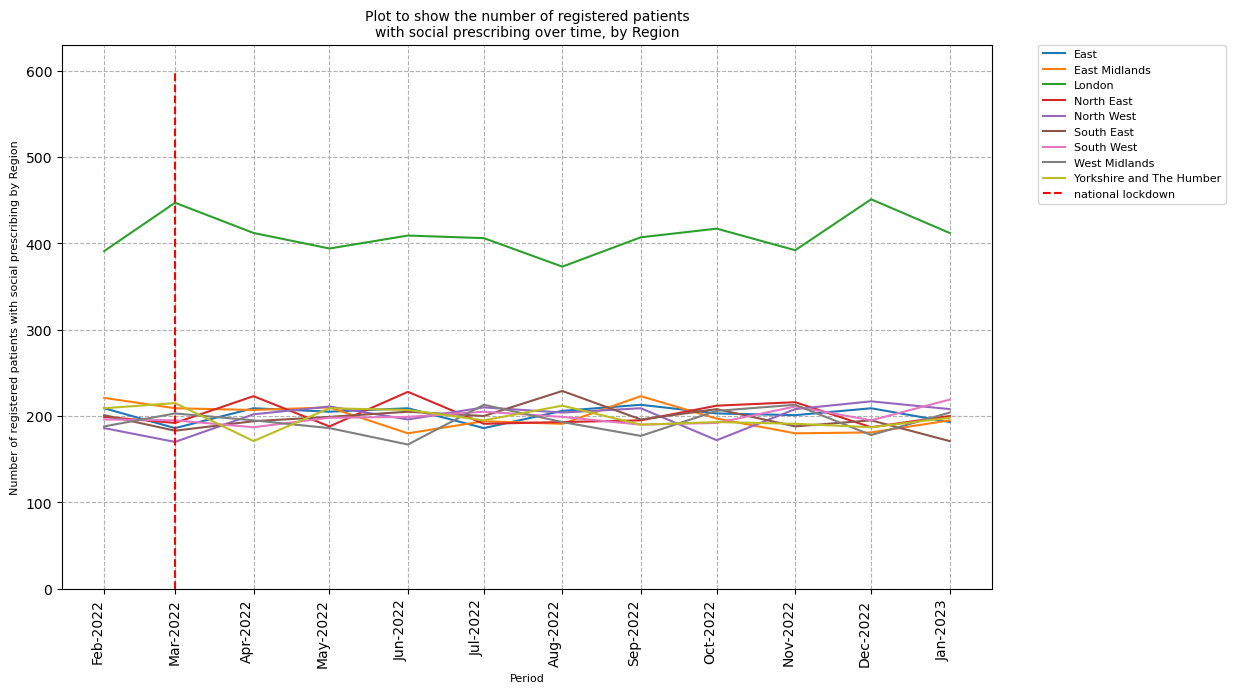

In [20]:
data_measure_social_prescribing_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["region"] != "nan", :]
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["with_social_prescribing"] == 1, :]
df = pd.DataFrame(data=data_measure_social_prescribing_region_rate)
df2 = df.groupby(['date', 'region']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by Region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=350000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [9]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     209              221       391           199           186           201           196              188                         209
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00     193              195       412           200           208           171           219              204                         198


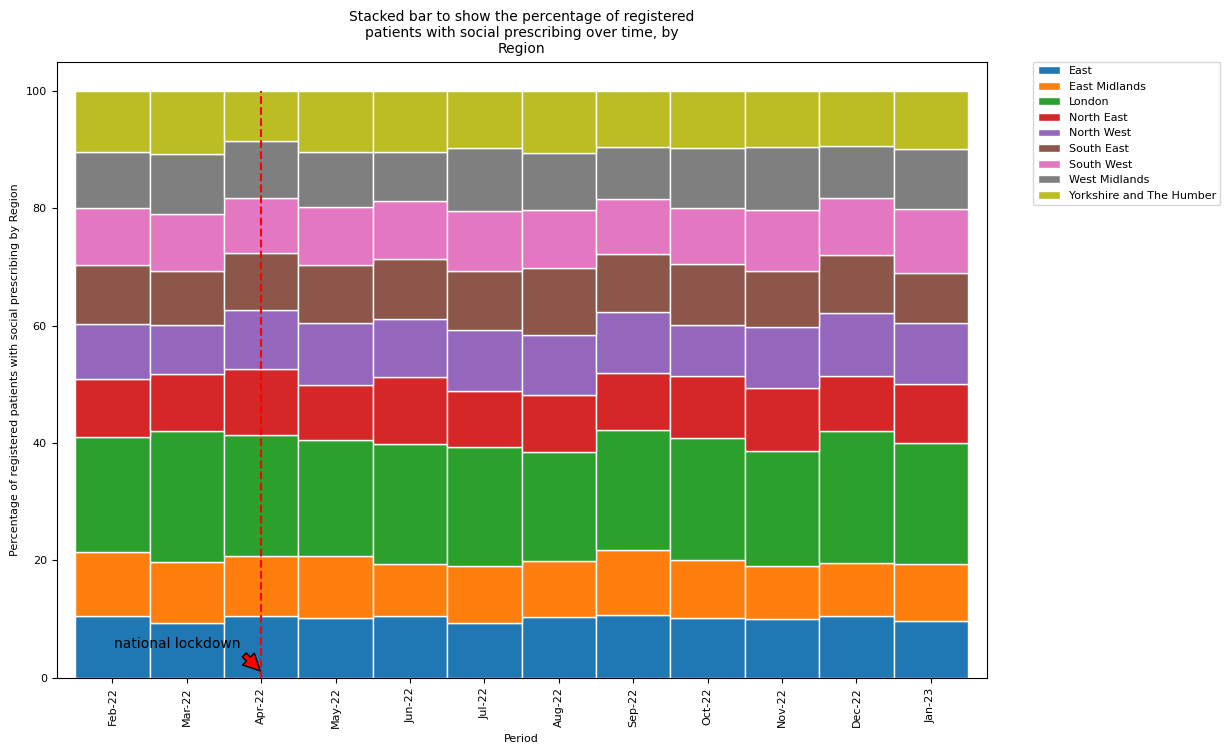

In [10]:
df_region_social_stacked = pd.DataFrame(df2)
df_region_social_stacked.head()
df_region_social_stacked.index = pd.to_datetime(df_region_social_stacked.index).strftime('%b-%y')
totrs = df_region_social_stacked.sum(axis=1)
perrs = df_region_social_stacked.div(totrs, axis=0).mul(100).round(2)
ax = perrs.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [11]:
print(tabulate(perrs.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrs.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22   10.45            11.05     19.55          9.95           9.3         10.05           9.8              9.4                       10.45
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23    9.65             9.75      20.6            10          10.4          8.55         10.95             10.2                         9.9


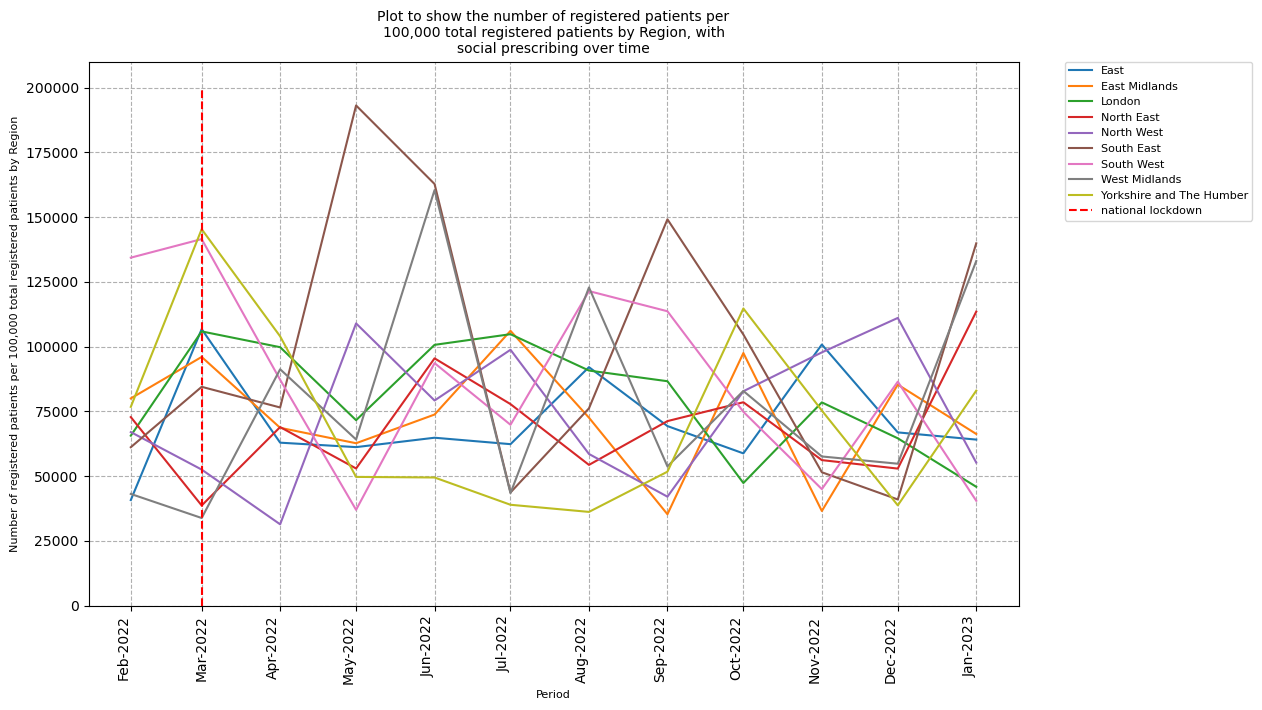

In [21]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'region']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=18000,
        ymax=21000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [13]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  40784.3            80026   65642.9       72817.5         67030       61188.4        134357          43151.5                       76771
date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00  64130.4          66292.6   45907.8        113532       55251.7        139900       40515.3           133061                     83026.8


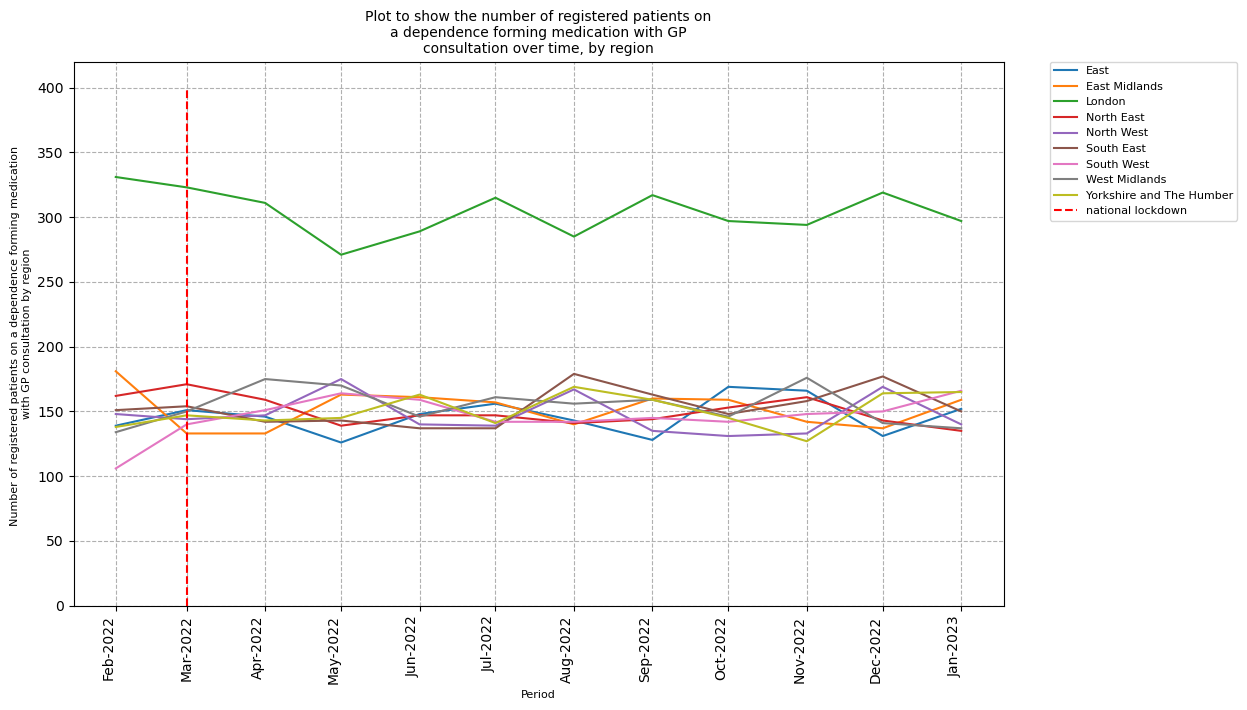

In [22]:
data_measure_consultation_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["region"] != "nan", :]
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["with_consultation"] == 1, :]
df = pd.DataFrame(data=data_measure_consultation_region_rate)
df2 = df.groupby(['date', 'region']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=13000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [15]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     139              181       331           162           148           151           106              134                         138
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00     152              159       297           135           140           150           166              137                         165


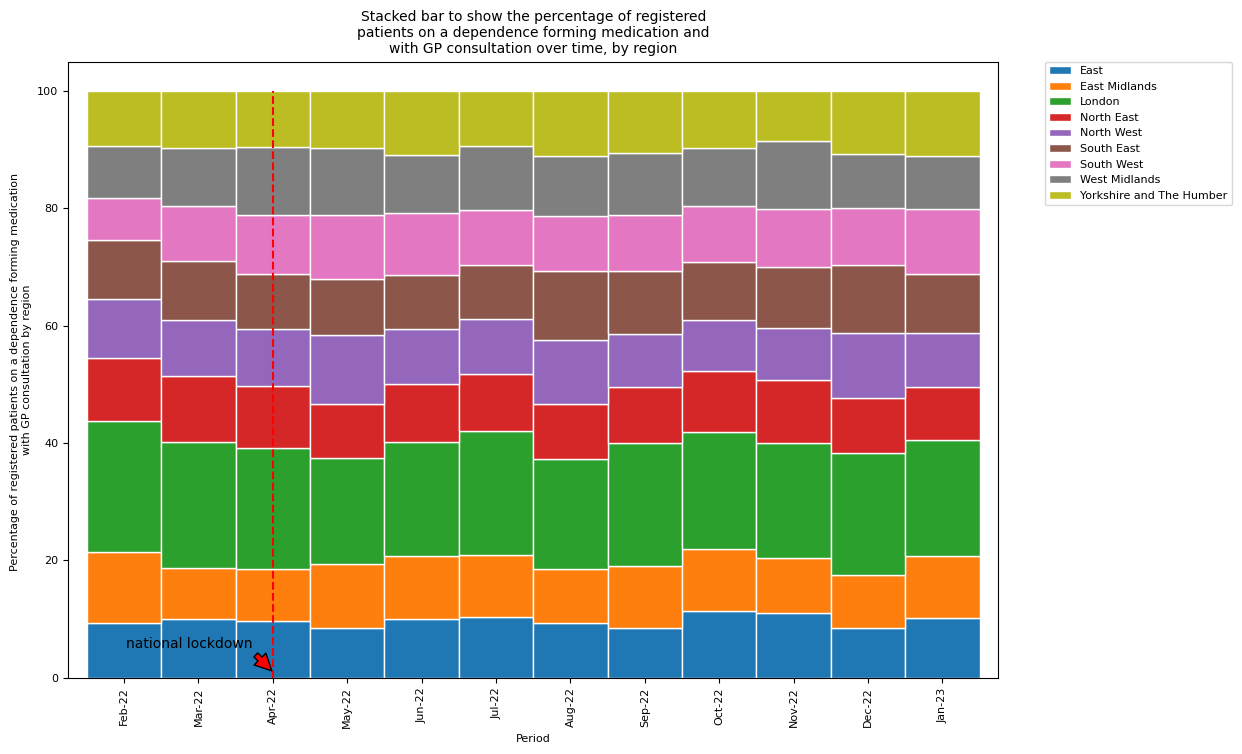

In [16]:
df_region_consult_stacked = pd.DataFrame(df2)
df_region_consult_stacked.head()
df_region_consult_stacked.index = pd.to_datetime(df_region_consult_stacked.index).strftime('%b-%y')
totrc = df_region_consult_stacked.sum(axis=1)
perrc = df_region_consult_stacked.div(totrc, axis=0).mul(100).round(2)
ax = perrc.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [17]:
print(tabulate(perrc.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrc.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22    9.33            12.15     22.21         10.87          9.93         10.13          7.11             8.99                        9.26
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23   10.13            10.59     19.79          8.99          9.33          9.99         11.06             9.13                       10.99


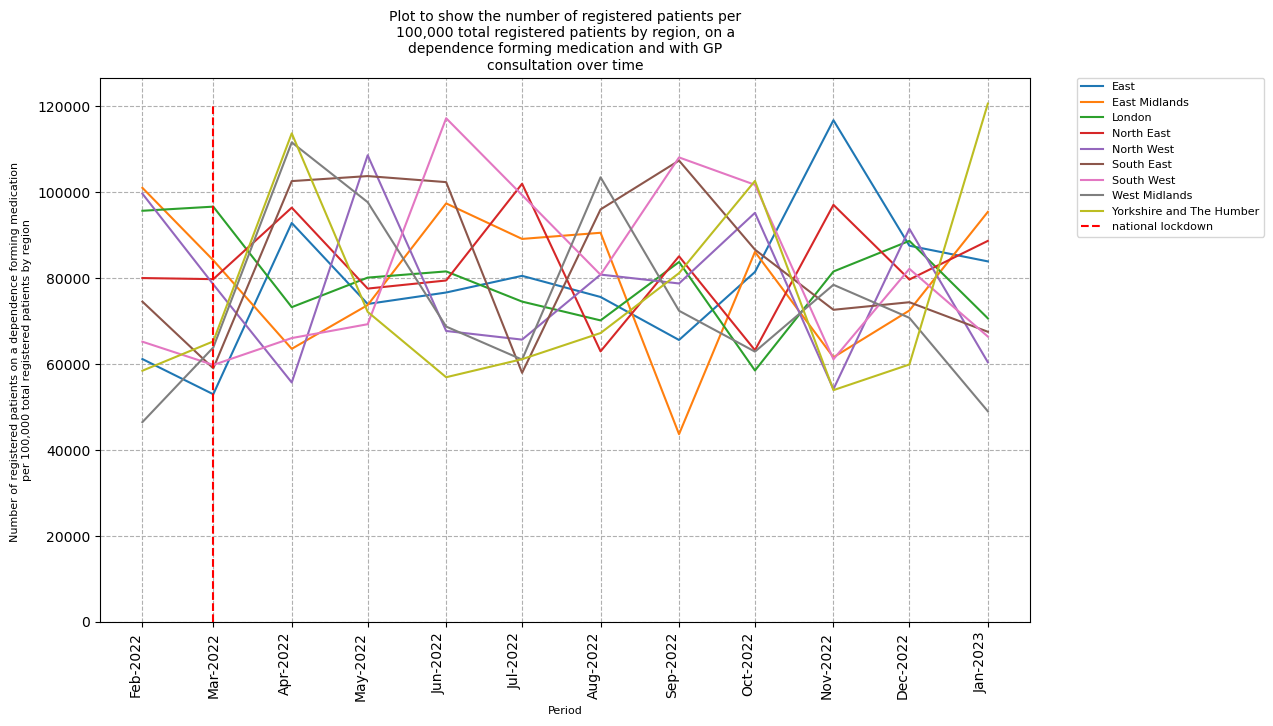

In [23]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'region']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=18000,
        ymax=21000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by region, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [19]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  61156.6           101022   95679.4       80017.3       99658.2       74528.7       65198.1          46469.4                     58443.6
date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00  83893.4          95422.1   70637.1       88667.7       60409.4       67507.7       66393.9          48993.7                      120626
